In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = !ls result/
files

['alra.csv',
 'alra_X_tsne.csv',
 'alra_X_umap.csv',
 'dca.csv',
 'dca_X_tsne.csv',
 'dca_X_umap.csv',
 'deepimpute.csv',
 'deepimpute_X_tsne.csv',
 'deepimpute_X_umap.csv',
 'gnnimpute.csv',
 'gnnimpute_X_tsne.csv',
 'gnnimpute_X_umap.csv',
 'magic.csv',
 'magic_X_tsne.csv',
 'magic_X_umap.csv',
 'raw.csv',
 'raw_X_tsne.csv',
 'raw_X_umap.csv',
 'scVGAE.csv',
 'scVGAE_X_tsne.csv',
 'scVGAE_X_umap.csv',
 'X_tsne_X_tsne.csv',
 'X_umap_X_umap.csv']

In [3]:
labels = pd.read_csv('result/raw.csv', index_col=0).index
labels

Index(['SS2', 'SS2', 'SS2', 'SS2', 'SS2', 'SS2', 'EpS3', 'SS1', 'SS2', 'EpS2',
       ...
       'EpS4', 'SS3', 'EpS4', 'EpS5', 'EpS4', 'EpS4', 'SS4', 'EpS4', 'EpS4',
       'SS1'],
      dtype='object', length=3567)

In [4]:
adatas = {}
for i in files:
    tmp = sc.AnnData(pd.read_csv('result/' + i, index_col=0).values)
    tmp.obs = pd.DataFrame(labels, columns=['labels'])
    adatas[i.split('.')[0]] = tmp

In [5]:
adatas[i.split('.')[0]].obs

labels
0       SS2
1       SS2
2       SS2
3       SS2
4       SS2
...     ...
3562   EpS4
3563    SS4
3564   EpS4
3565   EpS4
3566    SS1

[3567 rows x 1 columns]

In [6]:
for i in files:
    sc.pp.neighbors(adatas[i.split('.')[0]], n_neighbors=15, n_pcs=50)
    sc.tl.umap(adatas[i.split('.')[0]])
    sc.tl.tsne(adatas[i.split('.')[0]])

         Falling back to preprocessing with `sc.pp.pca` and default params.


/export/scratch/inoue019/envs/gpu1/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/export/scratch/inoue019/envs/gpu1/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/export/scratch/inoue019/envs/gpu1/lib/python3.10/site-packages/umap/d

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.


/export/scratch/inoue019/envs/gpu1/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.


/export/scratch/inoue019/envs/gpu1/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/export/scratch/inoue019/envs/gpu1/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [7]:
for i in ['X_umap', 'X_tsne']:
    for l in files:
        pd.DataFrame(adatas[l.split('.')[0]].obsm[i]).to_csv('result/{}_{}.csv'.format(l.split('.')[0], i.split('_')[1]))

In [31]:
res = !ls result
umap = [i for i in res if 'umap' in i]
tsne = [i for i in res if 'tsne' in i]

In [32]:
labels_ = pd.read_csv('result/raw.csv', index_col=0).index
labels_

Index(['SS2', 'SS2', 'SS2', 'SS2', 'SS2', 'SS2', 'EpS3', 'SS1', 'SS2', 'EpS2',
       ...
       'EpS4', 'SS3', 'EpS4', 'EpS5', 'EpS4', 'EpS4', 'SS4', 'EpS4', 'EpS4',
       'SS1'],
      dtype='object', length=3567)

In [39]:
umap

['alra_X_umap.csv',
 'dca_X_umap.csv',
 'deepimpute_X_umap.csv',
 'gnnimpute_X_umap.csv',
 'magic_X_umap.csv',
 'raw_X_umap.csv',
 'scVGAE_X_umap.csv']

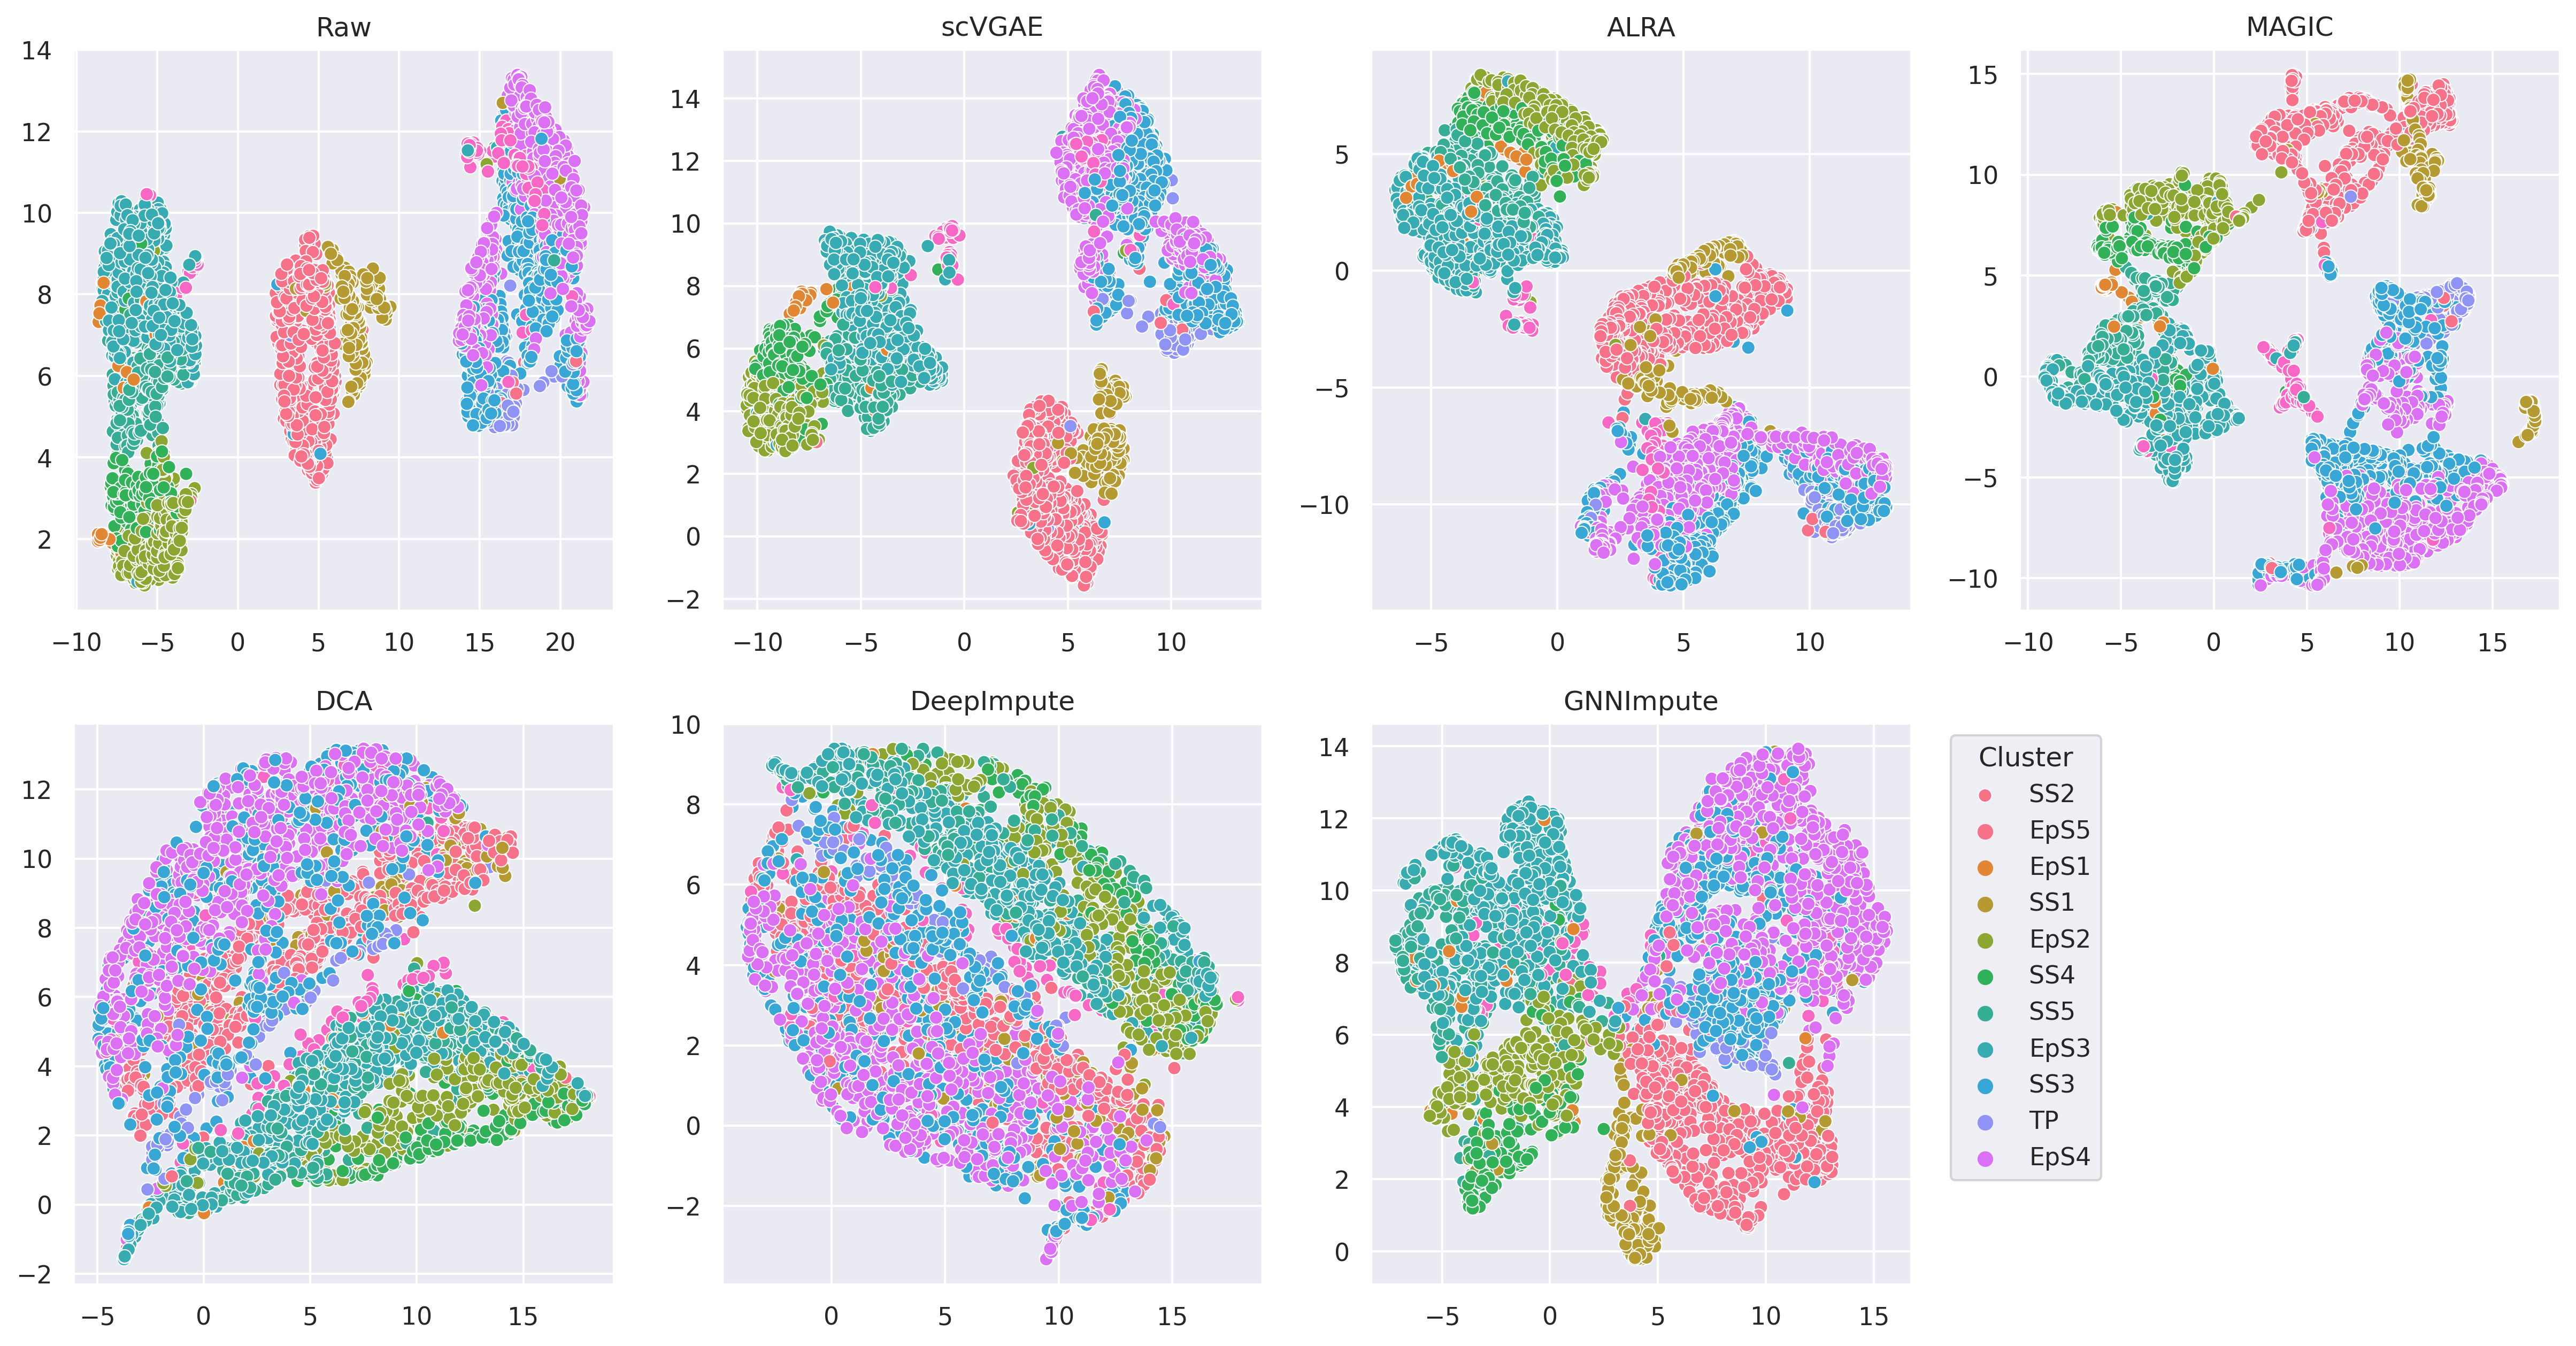

In [44]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(20, 10), dpi=300) 
grid = plt.GridSpec(2, 4, figure=fig)
sns.set(style='darkgrid')

for i, j in enumerate([
    'raw_X_umap.csv', 'scVGAE_X_umap.csv', 'alra_X_umap.csv', 
    'magic_X_umap.csv', 'dca_X_umap.csv', 'deepimpute_X_umap.csv', 'gnnimpute_X_umap.csv']):
    plt.subplot(grid[i // 4, i % 4])
    scatter = sns.scatterplot(data=pd.read_csv('result/'+j, index_col=0), x='0', y='1', hue=labels_)
    j = j.split('_')[0]
    if j in ['alra', 'dca', 'magic']:
        plt.title(j.upper())
    elif j == 'deepimpute':
        plt.title('DeepImpute')
    elif j == 'gnnimpute':
        plt.title('GNNImpute')
    elif j == 'raw':
        plt.title('Raw')
    else:
        plt.title(j)

    scatter.set_xlabel('')  # X軸のタイトルを空に設定
    scatter.set_ylabel('')  # Y軸のタイトルを空に設定
    if i == 6:
        scatter.legend(set(labels_), title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        scatter.legend().set_visible(False)
        
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

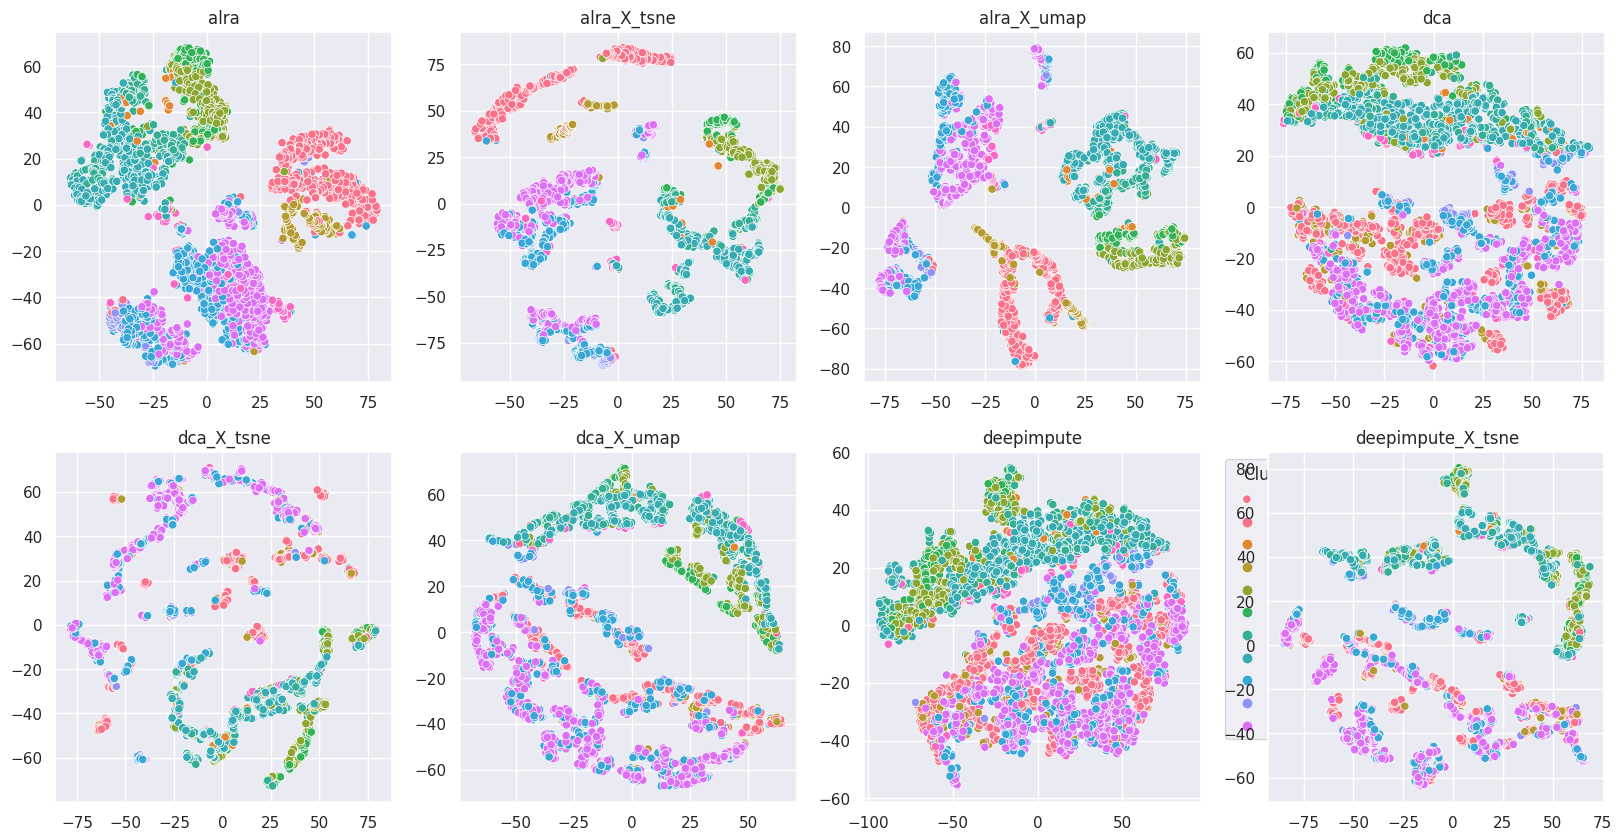

In [15]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(2, 4, figure=fig)
sns.set(style='darkgrid')

for i, j in enumerate(res['X_tsne'].keys()):
    plt.subplot(grid[i // 4, i % 4])
    scatter = sns.scatterplot(data=res['X_tsne'][j], x='0', y='1', hue=labels_)
    plt.title(j)
    scatter.set_xlabel('')  # X軸のタイトルを空に設定
    scatter.set_ylabel('')  # Y軸のタイトルを空に設定
    if i == 6:
        scatter.legend(set(labels_), title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        scatter.legend().set_visible(False)